# Example - Crack width study

The following example shows some of the features of the new RCS API.

Taking an existing file with a section that has a pre-defined reinforced cross-section we can modify the loading on the section to study effects the effects of the capcaity and crack width.

## Crack width study method

We can take the base model **crack-width-example.IdeaRcs** and open it using the API, we can then make modifications to it. 

After we open the project we will automate the following steps:
1. Increment the current internal force **My** by a choosen increment of moment loading.
2. Run the calculation.
3. Extract the results we want to check from the calculation - actually crack width.
4. Add the results to a dataframe which we can use to plot on a graph.

Below is and image of the base cross-section.

<img src="crack_width_section.png" alt="section" style="border: 2px solid black">

## Ensure required packages are installed

In [1]:
#install all required packages 
!pip install ideastatica-rcs-client>=24.0.0.4380
!pip install xmltodict
!pip install pandas
!pip install matplotlib
!pip install numpy

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Open existing project and get section details

In [2]:
import project_calculator

# file name of a rsc project to be calculate
project_to_calculate = r"crack-width-example.IdeaRcs"

#The increment of moment increase after each step.
moment_step = 3000

# det details from the rcs project
df_sections = project_calculator.get_section_details(project_to_calculate)

df_sections

ideastatica_rcs_client package initialized
{'TcpPort': 60945, 'IdeaStatiCaSetupDir': 'C:\\Program Files\\IDEA StatiCa\\StatiCa 23.1\\', 'RcsApiServicePath': 'C:\\Program Files\\IDEA StatiCa\\StatiCa 23.1\\net6.0-windows\\IdeaStatiCa.RcsRestApi.exe'}
None
closing IdeaStatiCa.RcsRestApi.exe


,Id,Name,RfCssId,Member
0,1,S 1,1,1


In [6]:
# section to calulate
section_in_rcs_project = 1
df_check = project_calculator.calc_rcs_crack_width(project_to_calculate, section_in_rcs_project, moment_step)

df_check

Section 'S 1' capacity 0.08133042503979834
sectId 1 Fu.My =  61477.608134388734
closing IdeaStatiCa.RcsRestApi.exe


,my,capacity,CrackWidth [mm]
0,5000.000000,0.081330,0.000000
1,8000.000000,0.130129,0.000000
2,11000.000000,0.178927,0.000000
3,14000.000000,0.227725,0.000000
4,17000.000000,0.276523,0.000000
5,20000.000000,0.325322,0.000000
6,23000.000000,0.374120,0.000000
7,26000.000000,0.422918,0.213776
8,29000.000000,0.471716,0.238442
9,32000.000000,0.520515,0.268581


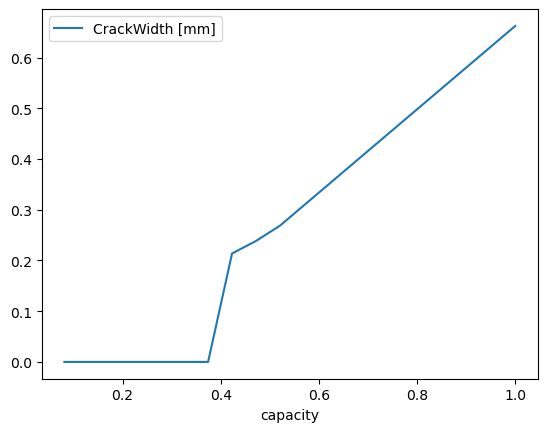

In [7]:
df_check.plot(x="capacity", y=["CrackWidth [mm]"])
 
# Display plot
plt.show()

